## Librerias

In [1]:
import requests
import json
import investpy
import datetime
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Fechas para la obtención de datos
fecha_inicio = "01/01/2000"
fecha_final = "31/12/2020"

##### No se encuentran los siguientes datos en API de investing:
- ACWI
- Inflación
- Pagares bancarios
- Cetes a 1 año (por la poca periodicidad que tiene la API)

Estas 4 variables se manejarán en el excel adjunto.

In [3]:
amxl = investpy.get_stock_historical_data(stock='AMXL',
                                        country='Mexico',
                                        from_date= fecha_inicio,
                                        to_date= fecha_final)

sp500 = investpy.get_index_historical_data(index='S&P 500',
                                        country='United States',
                                        from_date= fecha_inicio,
                                        to_date= fecha_final)

nasdaq = investpy.get_index_historical_data(index='Nasdaq',
                                        country='United States',
                                        from_date= fecha_inicio,
                                        to_date= fecha_final)

russell_01 = investpy.get_index_historical_data(index ='Russell 1000',
                                         country='United States',
                                        from_date= fecha_inicio,
                                        to_date= fecha_final)

russell_02 = investpy.get_index_historical_data(index ='SmallCap 2000',
                                         country='United States',
                                        from_date= fecha_inicio,
                                        to_date= fecha_final)

ipc = investpy.get_index_historical_data(index='S&P/BMV IPC',
                                        country='Mexico',
                                        from_date= fecha_inicio,
                                        to_date= fecha_final)

cetes1año = investpy.get_bond_historical_data(bond='México 1Y',
                                        from_date= fecha_inicio,
                                        to_date= fecha_final)

usd_mxn = investpy.get_currency_cross_historical_data(currency_cross='USD/MXN',
                                                  from_date= fecha_inicio,
                                                  to_date= fecha_final)

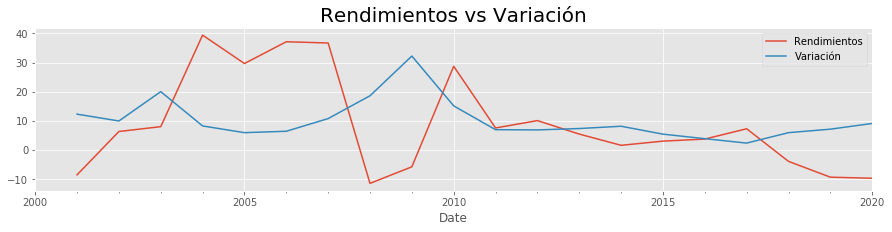

In [4]:
# Aqui se debe poner el nombre de la variable extraida necesariamente de la API
variable = ipc

# Cálculo del rendimiento
variable["Rendimiento"] = (np.log(variable["Close"]/variable["Close"].shift(252)))*100

# Resampleando todo por año obteniendo rendimiento promedio y variación del año
resumen = (pd.DataFrame({"Rendimientos" : variable["Rendimiento"].resample("Y").mean()}))
resumen["Variación"] = variable["Rendimiento"].resample("Y").std()

# Graficando valores obtenidos 
fig = plt.figure(figsize=(15, 3))
plt.title('Rendimientos vs Variación', fontsize=20)
resumen["Rendimientos"].plot()
resumen["Variación"].plot()
plt.legend()
plt.show()
plt.close(plt.gcf())

# Plus: si se desea saber los números en específico solo hay que llamar el df llamado "resumen"

In [5]:
# Este es el resumen de los resultados de la variable
resumen

,Rendimientos,Variación
Date,,
2000-12-31,NaN,NaN
2001-12-31,-8.532959,12.307164
2002-12-31,6.349865,9.962715
2003-12-31,8.013037,20.032892
2004-12-31,39.431722,8.256924
2005-12-31,29.680758,5.951199
2006-12-31,37.162801,6.436310
2007-12-31,36.727817,10.782062
2008-12-31,-11.462256,18.616259


# Búsqueda
#### Este es un motor de busqueda que encontre del API que nos ayuda a encontrar parámetros a instertar en el API para la obtención de los datos que queramos

In [ ]:
index_df.loc[index_df["name"] == "MSCI AC World Equity"]

In [ ]:
index_df = investpy.get_indices(country= None)
index_df.to_excel("Indices.xlsx")

In [ ]:
index_df = investpy.get_indices(country="United States")
indice = input("Introducir nombre de indice ")
index_df_search = index_df.loc[index_df["name"] == indice]
index_df_search

In [ ]:
bonds_df = investpy.get_bonds(country="México")
bonds_df

In [ ]:
stocks_df = investpy.get_stocks(country="United States")
stocks_df